In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./Book1.csv', sep=';')

In [3]:
df.head()

,unsullen.id,production.date,report.date,produced,defects,supplier
0,1.0,1,1,103.0,0.0,harpy.co
1,1.0,1,2,0.0,2.0,harpy.co
2,1.0,1,3,0.0,4.0,harpy.co
3,1.0,1,4,0.0,5.0,harpy.co
4,1.0,1,5,0.0,13.0,harpy.co


In [4]:
df.shape

(2700, 6)

In [5]:
df_harpy = df[df['supplier'] == 'harpy.co']

In [6]:
df_westeros = df[df['supplier'] == 'westeros.inc']

In [55]:
def f(df, name):
    ndf = df.drop(columns=['report.date', 'production.date']).groupby(['unsullen.id']).sum()
    produced = np.array(ndf['produced'].values)
    defects = np.array(ndf['defects'].values)
    defproc = np.around(defects / produced, decimals=2)
    
    print(name, ' produced all sum: ', produced.sum())
    print('\n')
    print(name, 'defects all sum: ', defects.sum())
    print('\n')
    print(name, ' defects procent all: {} %'.format(100 * round(defects.sum() /  produced.sum(), 2)))
    print('\n')
    print(name, ' produced mean for unsullen: ', produced.mean())
    print(name, ' max produced for unsullen: {} / id: {}'.format(produced.max(), produced.argmax()))
    print(name, ' min produced for unsullen: {} / id: {}'.format(produced.min(), produced.argmin()))
    print('\n')
    print(name, ' defects mean for unsullen: ', defects.mean())
    print(name, ' max defects for unsullen: {} / id: {}'.format(defects.max(), defects.argmax()))
    print(name, ' min defects for unsullen: {} / id: {}'.format(defects.min(), defects.argmin()))
    print('\n')
    print(name, ' defects procent mean: {} %'.format(100 * round(defproc.mean(), 2)))
    print(name, ' max defects procent for unsullen: {} % / id: {}'.format(100 * defproc.max(), defproc.argmax()))
    print(name, ' min defects procent for unsullen: {} % / id: {}'.format(100 * defproc.min(), defproc.argmin()))
    
    ndf = df.drop(columns=['report.date', 'unsullen.id']).groupby(['production.date']).sum()
    prod = np.array(ndf['produced'].values)
    defects = np.array(ndf['defects'].values)
    
    remained_month = prod - defects # Сколько всего осталось из партии n-го месяца
            
    mean_broke = np.array([])  # Сколько в среднем сломалось после n месяцев
    sum_broke = np.array([])   # Сколько всего сломалось после n месяцев
    a = np.array([])
    for month in range(1, 7):
        for i in range(1, 7 - month + 1):
            ndf1 = df[(df['production.date'] == i) & (df['report.date'] == i + month)]
            a = np.append(a, ndf1['defects'].sum())
        mean_broke = np.append(mean_broke, a.mean())
        sum_broke = np.append(sum_broke, a.sum())
        a = np.array([])
    
    return prod, defects.sum(), remained_month, mean_broke, sum_broke 

In [56]:
prod_for_mounth_H, def_all_H, remained_mounth_H, mean_broke_H, sum_broke_H = f(df_harpy, 'Harpy')

Harpy  produced all sum:  31532.0


Harpy defects all sum:  6080.0


Harpy  defects procent all: 19.0 %


Harpy  produced mean for unsullen:  630.64
Harpy  max produced for unsullen: 647.0 / id: 47
Harpy  min produced for unsullen: 617.0 / id: 44


Harpy  defects mean for unsullen:  121.6
Harpy  max defects for unsullen: 143.0 / id: 36
Harpy  min defects for unsullen: 103.0 / id: 23


Harpy  defects procent mean: 19.0 %
Harpy  max defects procent for unsullen: 23.0 % / id: 36
Harpy  min defects procent for unsullen: 16.0 % / id: 23


In [57]:
prod_for_mounth_W, def_all_W, remained_mounth_W, mean_broke_W, sum_broke_W = f(df_westeros, 'Westeros')

Westeros  produced all sum:  31625.0


Westeros defects all sum:  8268.0


Westeros  defects procent all: 26.0 %


Westeros  produced mean for unsullen:  632.5
Westeros  max produced for unsullen: 645.0 / id: 2
Westeros  min produced for unsullen: 619.0 / id: 30


Westeros  defects mean for unsullen:  165.36
Westeros  max defects for unsullen: 188.0 / id: 14
Westeros  min defects for unsullen: 141.0 / id: 6


Westeros  defects procent mean: 26.0 %
Westeros  max defects procent for unsullen: 30.0 % / id: 14
Westeros  min defects procent for unsullen: 23.0 % / id: 6


Harpy:  [5248. 5256. 5243. 5282. 5243. 5260.]
Westeros:  [5280. 5272. 5298. 5285. 5263. 5227.]


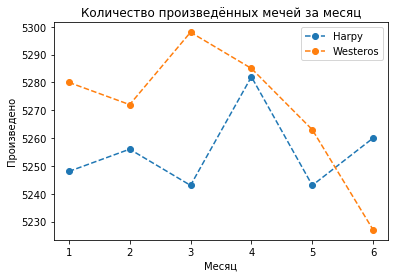

In [58]:
m = np.arange(1, 7)
print('Harpy: ', prod_for_mounth_H)
print('Westeros: ', prod_for_mounth_W)
plt.plot(m, prod_for_mounth_H, 'o--', label='Harpy')
plt.plot(m, prod_for_mounth_W, 'o--', label='Westeros')
plt.title('Количество произведённых мечей за месяц')
plt.ylabel('Произведено')
plt.xlabel('Месяц')
plt.legend()
plt.show()

Production : Harpy 31532.0 | Westeros 31625.0
Defects : Harpy 6080.0 | Westeros 8268.0


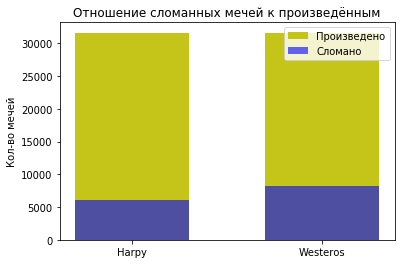

In [59]:
a = np.array([prod_for_mounth_H.sum(), prod_for_mounth_W.sum()])
d = np.array([def_all_H, def_all_W])
n = np.array(['Harpy', 'Westeros'])
print('Production : Harpy {} | Westeros {}'.format(a[0], a[1]))
print('Defects : Harpy {} | Westeros {}'.format(d[0], d[1]))
plt.bar(n, a, width=0.6, alpha=0.9, label='Произведено', color='y')
plt.bar(n, d, width=0.6, alpha=0.6, label='Сломано', color='b')
plt.title('Отношение сломанных мечей к произведённым')
plt.ylabel('Кол-во мечей')
plt.legend()
plt.show()

Harpy:  [130. 134. 130. 760. 645. 537.]
Westeros:  [447. 413. 376. 356. 334. 281.]


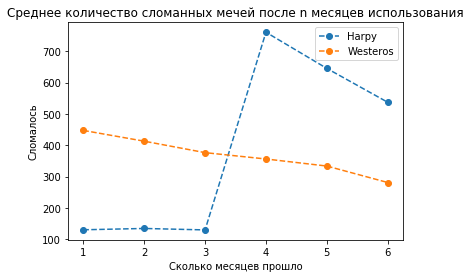

In [60]:
print('Harpy: ', mean_broke_H.round())
print('Westeros: ', mean_broke_W.round())
plt.plot(m, mean_broke_H, 'o--', label='Harpy')
plt.plot(m, mean_broke_W, 'o--', label='Westeros')
plt.title('Среднее количество сломанных мечей после n месяцев использования')
plt.ylabel('Сломалось')
plt.xlabel('Сколько месяцев прошло')
plt.legend()
plt.show()

Harpy:  [ 781.  672.  519. 2281. 1290.  537.]
Westeros:  [2683. 2064. 1505. 1068.  667.  281.]


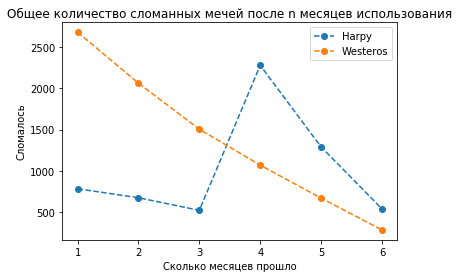

In [61]:
print('Harpy: ', sum_broke_H)
print('Westeros: ', sum_broke_W)
plt.plot(m, sum_broke_H, 'o--', label='Harpy')
plt.plot(m, sum_broke_W, 'o--', label='Westeros')
plt.title('Общее количество сломанных мечей после n месяцев использования')
plt.ylabel('Сломалось')
plt.xlabel('Сколько месяцев прошло')
plt.legend()
plt.show()

Harpy:  [2893. 3458. 4109. 4874. 4985. 5133.]
Westeros:  [3094. 3327. 3641. 4074. 4431. 4790.]


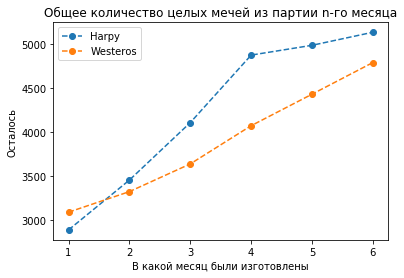

In [62]:
print('Harpy: ', remained_mounth_H)
print('Westeros: ', remained_mounth_W)
plt.plot(m, remained_mounth_H, 'o--', label='Harpy')
plt.plot(m, remained_mounth_W, 'o--', label='Westeros')
plt.title('Общее количество целых мечей из партии n-го месяца')
plt.ylabel('Осталось')
plt.xlabel('В какой месяц были изготовлены')
plt.legend()
plt.show()